# Homework 2
## Problem 0.4. Pocket Algorithm
## Done by: Sultan

### **Step 1**

Define helper functions

In [ ]:
def vector_to_func(vec, x):
  return ((vec[1]*x) / vec[2]) + (vec[0] / vec[2])


# Generate data points
def generate_data(num_points, f):
  data = np.zeros((num_points, 3))
  data[:, 1:2] = np.random.uniform(0, 10, (num_points, 1))
  data[:, 0:1] = np.random.uniform(0, 10, (num_points, 1))
  x = data[:, 0]
  y = data[:, 1]

  # divide points to 2 classes depended on target function
  labels = [1 if y[i] >= vector_to_func(f, x[i]) else -1 for i in range(0,num_points)]

  # flip random 10 data points
  for _ in range(int(num_points / 10)):
    rand_label = random.randint(0, num_points - 1)
    labels[rand_label] = labels[rand_label] * (-1)

  labels = np.array(labels).reshape((num_points, 1))

  # add labels to data array
  data[:, 2:3] = labels
  return data

# get average of a list
def Average(lst):
    return sum(lst) / len(lst)

Generate and plot target function + Noisy data (10 percent is manually flipped):

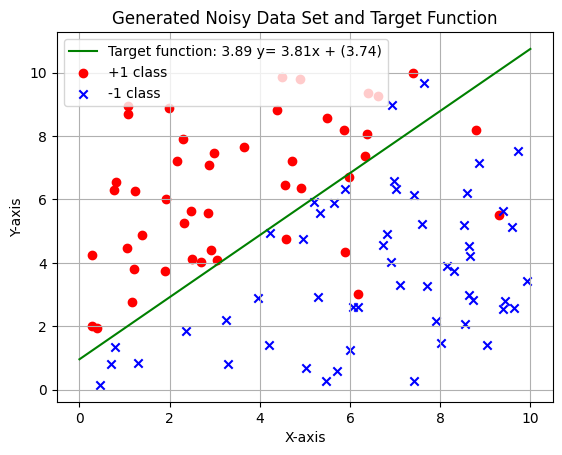

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

DATA_NUM = 100

# Define the target function
f = np.random.uniform(1, 6, 3)

# Plot the target function f(x)
x_target = np.linspace(0, 10, 100)
plt.plot(x_target, vector_to_func(f, x_target), 'g', label=f'Target function: {round(f[2], 2)} y= {round(f[1], 2)}x + ({round(f[0], 2)})')

# Generate 20 data points
data = generate_data(DATA_NUM, f)
x = data[:, 0]
y = data[:, 1]

#Plot the data points
plt.scatter(x[(data[:, 2] == 1)], y[(data[:, 2] == 1)], c='r', marker='o', label='+1 class')
plt.scatter(x[(data[:, 2] == -1)], y[(data[:, 2] == -1)], c='b', marker='x', label='-1 class')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.title('Generated Noisy Data Set and Target Function')
plt.show()




Generate Test data

In [ ]:
# Generate 1000 data points
test_data = generate_data(1000, f)

### **Step 2**

Define error function for PLA algorithm

In [ ]:
def PLA_error(w, data):
  errors = 0
  data_num = len(data)

  for i in range(data_num):
    x = np.array([1, data[i][0], data[i][1]])

    # if hypothesis misclassified
    if w.dot(x) < 0 and data[i][2] == 1:
      # update w
      w = w + x
      errors += 1


    if w.dot(x) >= 0 and data[i][2] == -1:
      # update w
      w = w - x
      errors += 1

  return errors / data_num




Define PLA Pocket Algorithm

In [ ]:


# perceptron learning algorithm
def PLA(data, epochs):
    errors_lst = []
    pocket_err = []
    test_errors = []
    pocket_test = []
    data_num = len(data)

    # initialize vector w by the first input data
    w = np.array([0, data[0][0], data[0][1]])

    # initialize pocket
    w_pocket = w

    err = PLA_error(w, data)
    errors_lst.append(err)
    pocket_err.append(err)

    out_err = PLA_error(w, test_data)
    test_errors.append(out_err)
    pocket_test.append(out_err)

    for _ in range(epochs):

      i = random.randint(0, data_num - 1)
      x = np.array([1, data[i][0], data[i][1]])


      # if hypothesis misclassified
      if w.dot(x) < 0 and data[i, 2] == 1:
        # update w
        w = w + x

      if w.dot(x) >= 0 and data[i, 2] == -1:
        # update w
        w = w - x

      new_err = PLA_error(w, data)
      new_out_err = PLA_error(w, test_data)

      if new_err < err:
        w_pocket = w
        err = new_err
        out_err = new_out_err

      errors_lst.append(new_err)
      pocket_err.append(err)
      test_errors.append(new_out_err)
      pocket_test.append(out_err)


    return w_pocket, errors_lst, pocket_err, test_errors, pocket_test






Get predicted function

In [ ]:
w, errors_lst, pocket_err, test_errors, pocket_test = PLA(data, 1000)

In [ ]:
hyp = np.array([-1* w[0], -1 * w[1], 1 * w[2]])

Draw a graph along with the predicted function

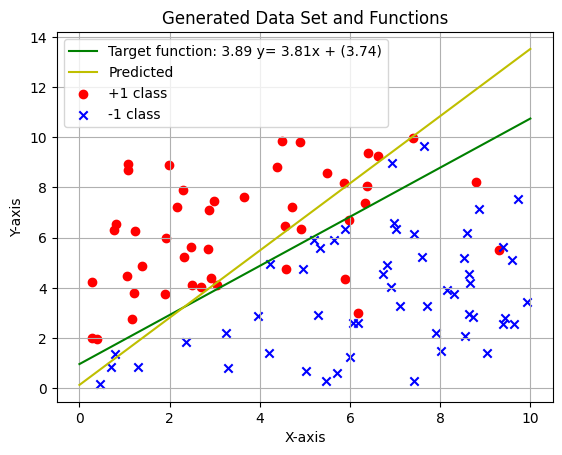

In [ ]:
# Plot the target function f(x)
plt.plot(x_target, vector_to_func(f, x_target), 'g', label=f'Target function: {round(f[2], 2)} y= {round(f[1], 2)}x + ({round(f[0], 2)})')

# Plot the hypothesis
plt.plot(x_target, vector_to_func(hyp, x_target), 'y', label=f'Predicted')

#Plot the data points
plt.scatter(x[(data[:, 2] == 1)], y[(data[:, 2] == 1)], c='r', marker='o', label='+1 class')
plt.scatter(x[(data[:, 2] == -1)], y[(data[:, 2] == -1)], c='b', marker='x', label='-1 class')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.title('Generated Data Set and Functions')
plt.show()

## **Step 3**

Repeat the experiment for 20 times and save average Ein(w(t)) and Ein(w∗(t))



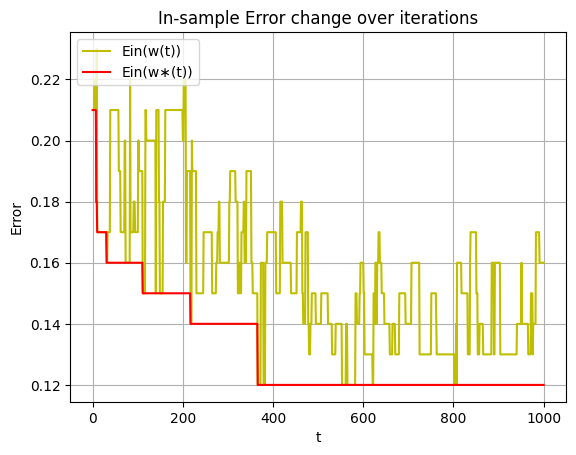

In [ ]:
plt.plot(np.linspace(0, 1000, 1001), errors_lst, 'y', label=f'Ein(w(t))')
plt.plot(np.linspace(0, 1000, 1001), pocket_err, 'r', label=f'Ein(w∗(t))')

# Add labels and legend
plt.xlabel('t')
plt.ylabel('Error')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.title('In-sample Error change over iterations')
plt.show()

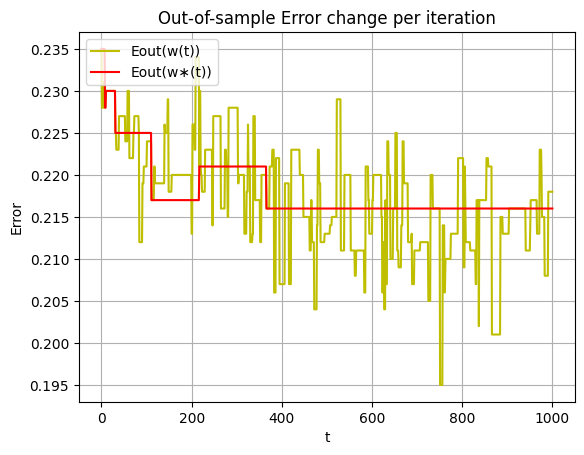

In [ ]:
plt.plot(np.linspace(0, 1000, 1001), test_errors, 'y', label=f'Eout(w(t))')
plt.plot(np.linspace(0, 1000, 1001), pocket_test, 'r', label=f'Eout(w∗(t))')

# Add labels and legend
plt.xlabel('t')
plt.ylabel('Error')
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.title('Out-of-sample Error change per iteration')
plt.show()